### load output

In [1]:
import numpy as np

In [8]:
output = np.load('/mnt/aperto/yin/MAE/inference_model/output.npy')

In [10]:
output.shape

(1, 4, 40, 256, 256)

In [18]:
dP = np.zeros((3, 40, 256, 256), dtype=np.float32)
dP[0] = output[0,1].astype(np.float32)
dP[1] = output[0,2].astype(np.float32)
dP[2] =  output[0,3].astype(np.float32)
cellprob =  output[0,0].astype(np.float32)

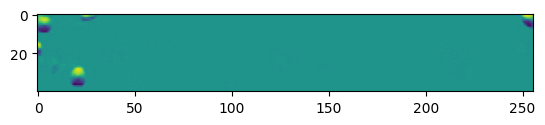

In [27]:
import matplotlib.pyplot as plt

plt.imshow(dP[0,:,100,:])

In [23]:
cellmask = cp_dynamics.compute_masks(dP, cellprob, min_size=0, flow_threshold=None, cellprob_threshold = 0.5, do_3D=True)

In [28]:
from cellpose import dynamics

cellmask_uptdate = dynamics.compute_masks(dP, cellprob, min_size=0, flow_threshold=None, cellprob_threshold = 0.5, do_3D=True)

In [32]:
len(cellmask_uptdate)

2

In [38]:
from napari_cellseg3d.code_models.models.zencell.cellpose.dynamics import (
    compute_masks,
)

prob1 = np.load('/mnt/aperto/yin/napari_cellseg/napari_cellseg3d/code_models/models/zencell/output/sig1_ref3_z1200_y4000_x3000_cell_prob.npy')
flow1 = np.load('/mnt/aperto/yin/napari_cellseg/napari_cellseg3d/code_models/models/zencell/output/sig1_ref3_z1200_y4000_x3000_cell_flow.npy')

In [39]:

cellmask_uptdate = compute_masks(flow1, prob1, min_size=0, flow_threshold=None, cellprob_threshold = 0.5, do_3D=True)

In [ ]:
cellmask_uptdate[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
import napari

viewer = napari.Viewer()
viewer.add_labels(cellmask_uptdate[0], blending='additive')
#viewer.add_image(flow1)
# viewer.add_image(prob2)
# viewer.add_image(flow2)

TypeError: Only integer types are supported for Labels layers, but data contains float32.

In [22]:
z,y,x =prob.shape